In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-variants/covid-variants.csv


In [2]:
df=pd.read_csv('/kaggle/input/covid19-variants/covid-variants.csv')

In [3]:
import pandas as pd
import numpy as np
import io
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas_profiling
import plotly.express as px

In [4]:
df.describe()

,num_sequences,perc_sequences,num_sequences_total
count,100416.000000,100416.000000,100416.000000
mean,72.171676,6.154355,1509.582457
std,1669.262169,21.898989,8445.291772
min,0.000000,-0.010000,1.000000
25%,0.000000,0.000000,12.000000
50%,0.000000,0.000000,59.000000
75%,0.000000,0.000000,394.000000
max,142280.000000,100.000000,146170.000000


#tracking daily omicron cases

<AxesSubplot:xlabel='date'>

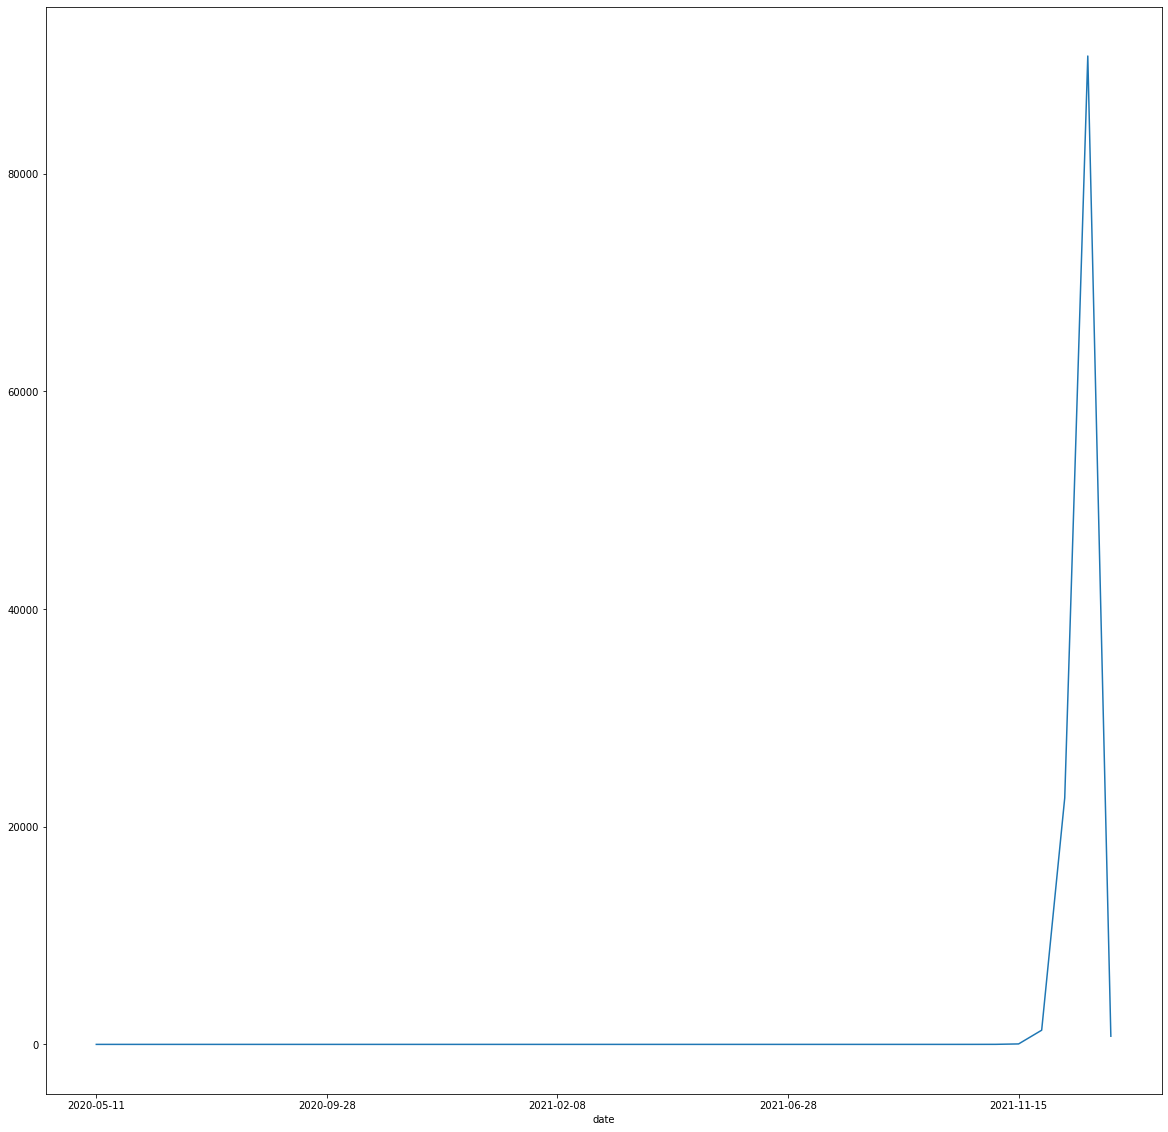

In [5]:
plt.figure(figsize = (20, 20))
df.loc[df['variant'] == 'Omicron'].groupby('date')['num_sequences'].agg('sum').plot()

Global Map of COVID-19 Variants Progession


In [6]:
def analysis(df):
    
    
    print("------------DIMENSIONS ----------")
    print("Observation:", df.shape[0], "Column:", df.shape[1], "\n")

    print("--------------DTYPES------------- ")
    if len(df.select_dtypes("object").columns) > 0:
        print("Object Variables:", "\n", "variables:", 
              len(df.select_dtypes("object").columns), "\n", 
              df.select_dtypes("object").columns.tolist(), "\n")

    if len(df.select_dtypes("integer").columns) > 0:
        print("Integer Variables:", "\n", "variables:", 
              len(df.select_dtypes("integer").columns), "\n", 
              df.select_dtypes("integer").columns.tolist(), "\n")

    if len(df.select_dtypes("float").columns) > 0:
        print("Float Variables:", "\n", "variables:", 
              len(df.select_dtypes("float").columns), "\n", 
              df.select_dtypes("float").columns.tolist(), "\n")

    if len(df.select_dtypes("bool").columns) > 0:
        print("Bool Variables:", "\n", "variables:", 
              len(df.select_dtypes("bool").columns), "\n", 
              df.select_dtypes("bool").columns.tolist(), "\n")

    print("--------------MISSING VALUE----------")
    print("Any missing values? \n ", np.where(df.isnull().values.any() == False,  "No missing value❌", "Data includes missing value✔️"), "\n")

    buf = io.StringIO()
    df.info(buf=buf)
    info = buf.getvalue().split('\n')[-2].split(":")[1].strip()
    print("--------------MEMORY USAGE------------ \n", info)
    
    return df

In [7]:
import numpy as np
import io
df = analysis(df)
df.head()

------------DIMENSIONS ----------
Observation: 100416 Column: 6 

--------------DTYPES------------- 
Object Variables: 
 variables: 3 
 ['location', 'date', 'variant'] 

Integer Variables: 
 variables: 2 
 ['num_sequences', 'num_sequences_total'] 

Float Variables: 
 variables: 1 
 ['perc_sequences'] 

--------------MISSING VALUE----------
Any missing values? 
  No missing value❌ 

--------------MEMORY USAGE------------ 
 4.6+ MB


,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3


In [8]:
sample  = df.rename(columns={"location":"Location","num_sequences_total":"Number of Case"})
fig = px.treemap(sample, path=[px.Constant('Number of Case'),'Location'], values='Number of Case',
                   hover_data=['Location'])
fig.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



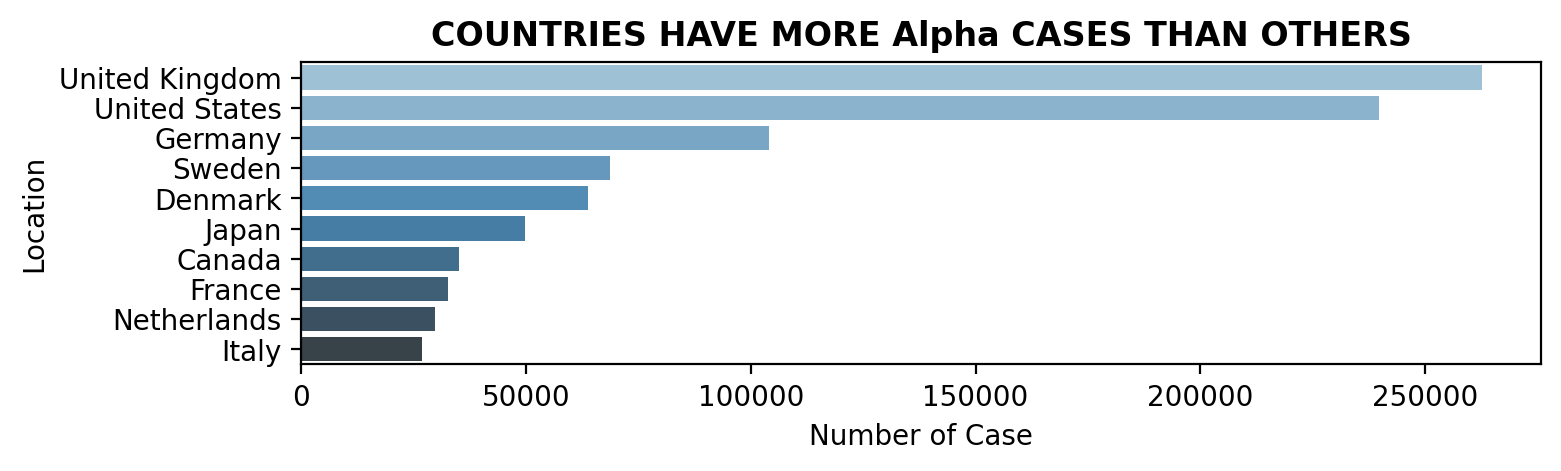

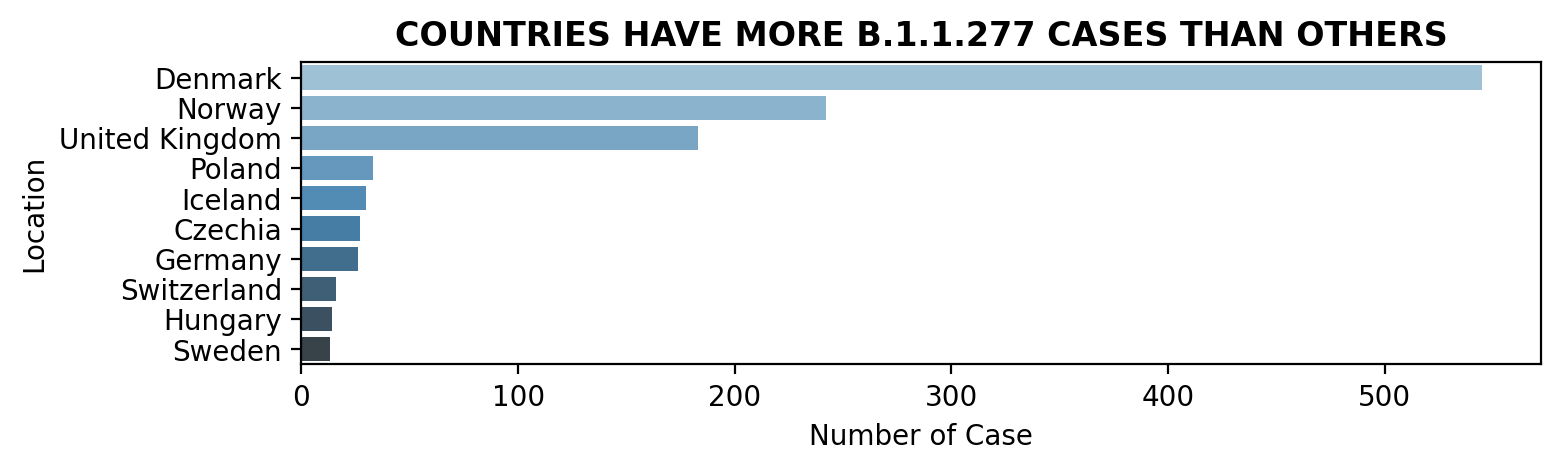

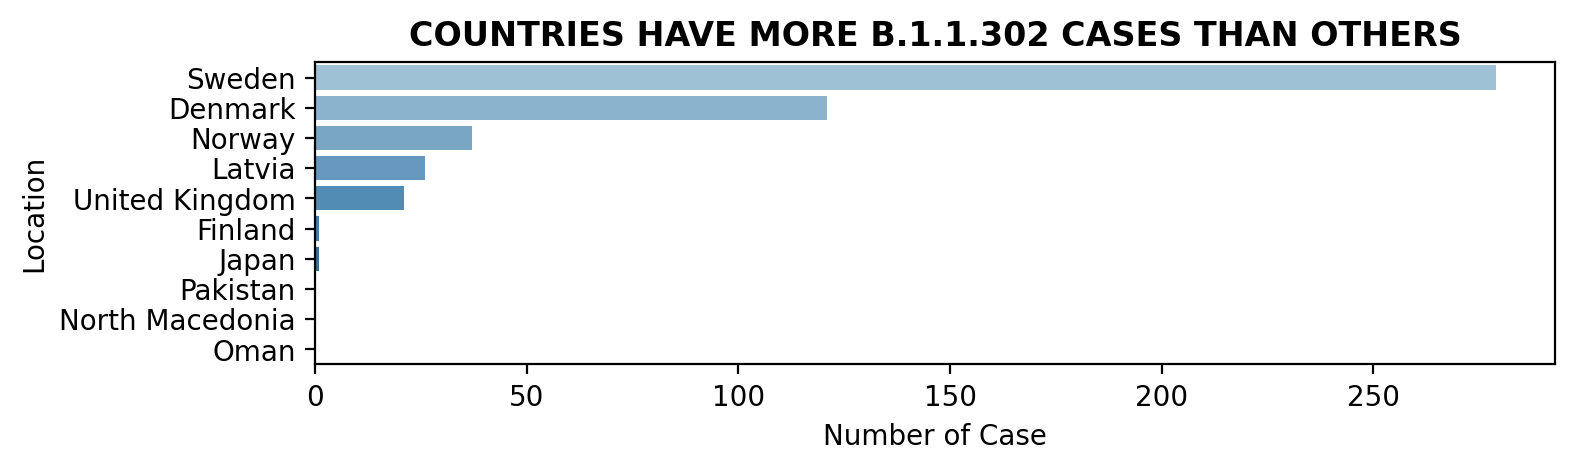

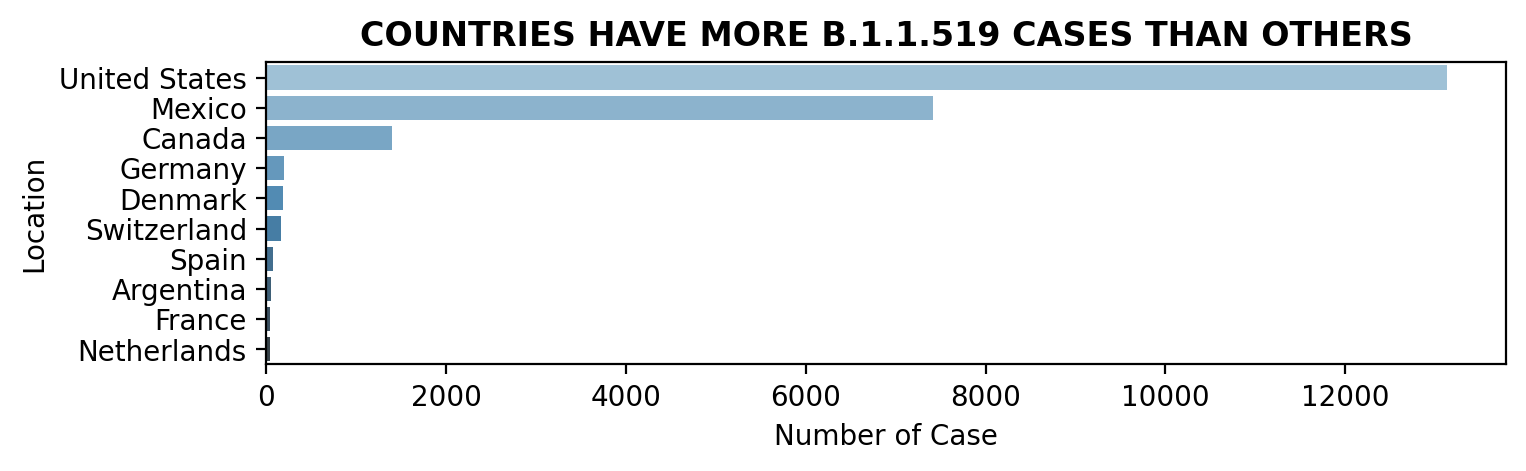

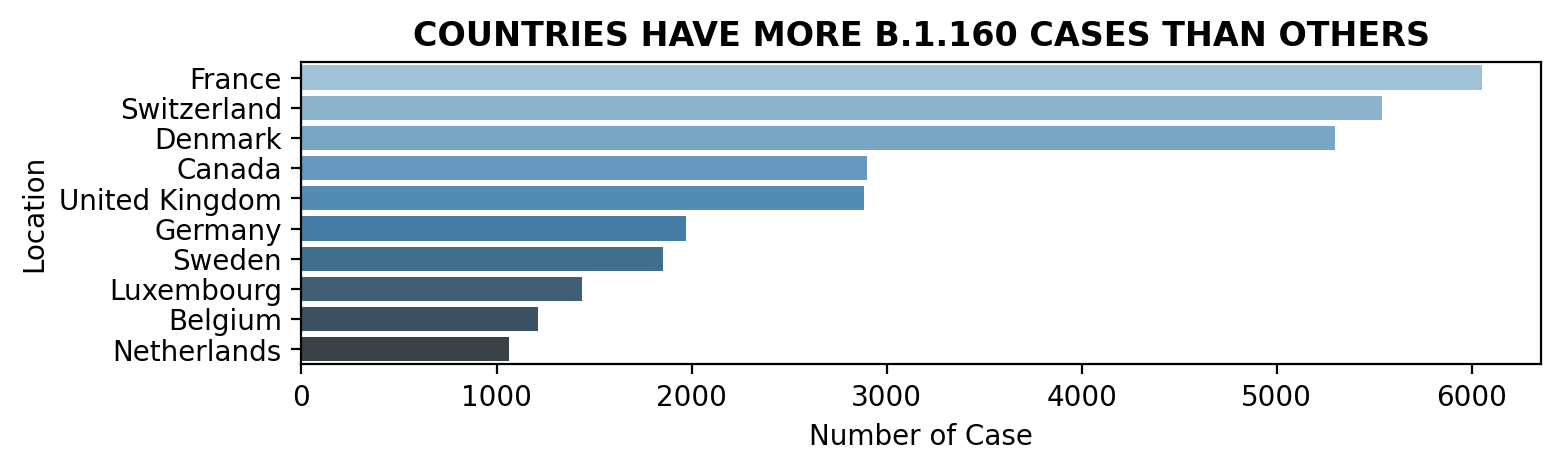

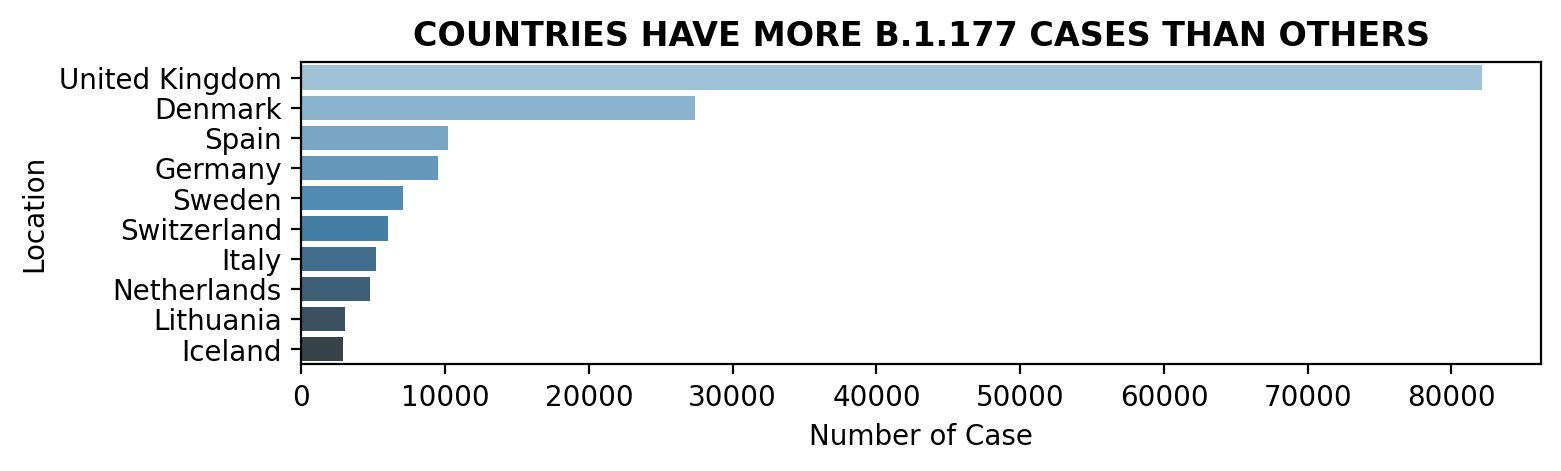

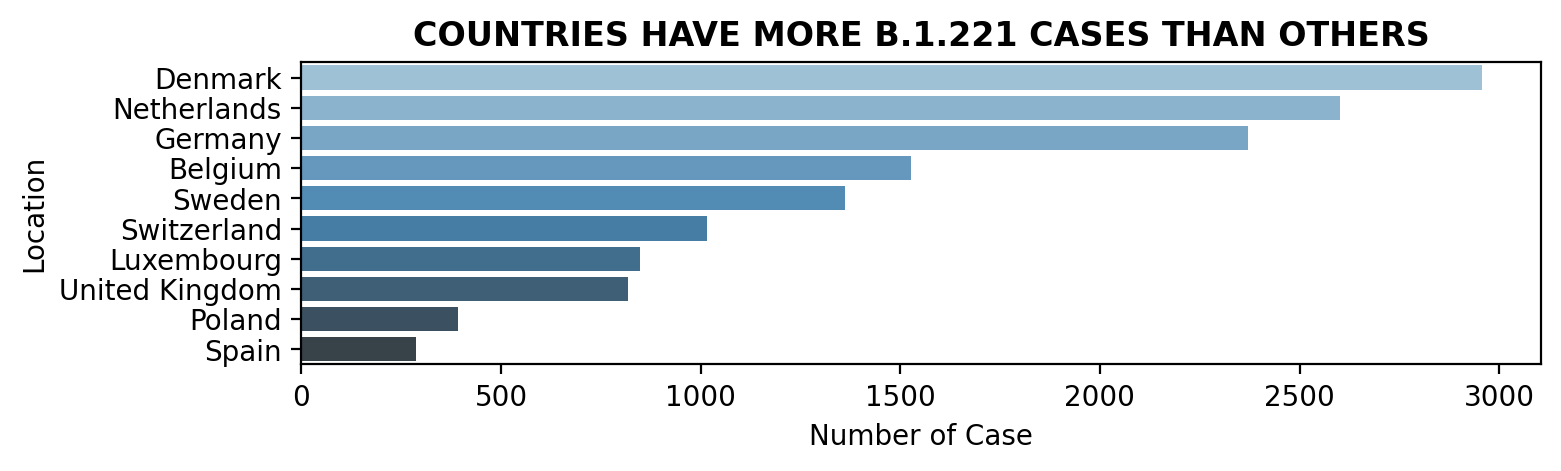

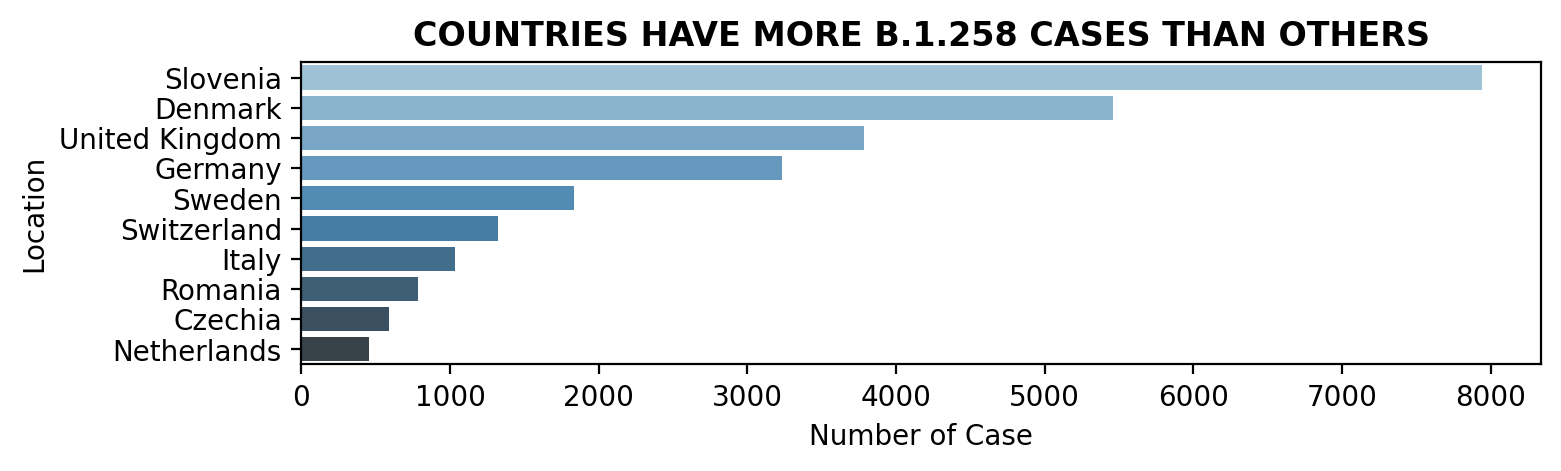

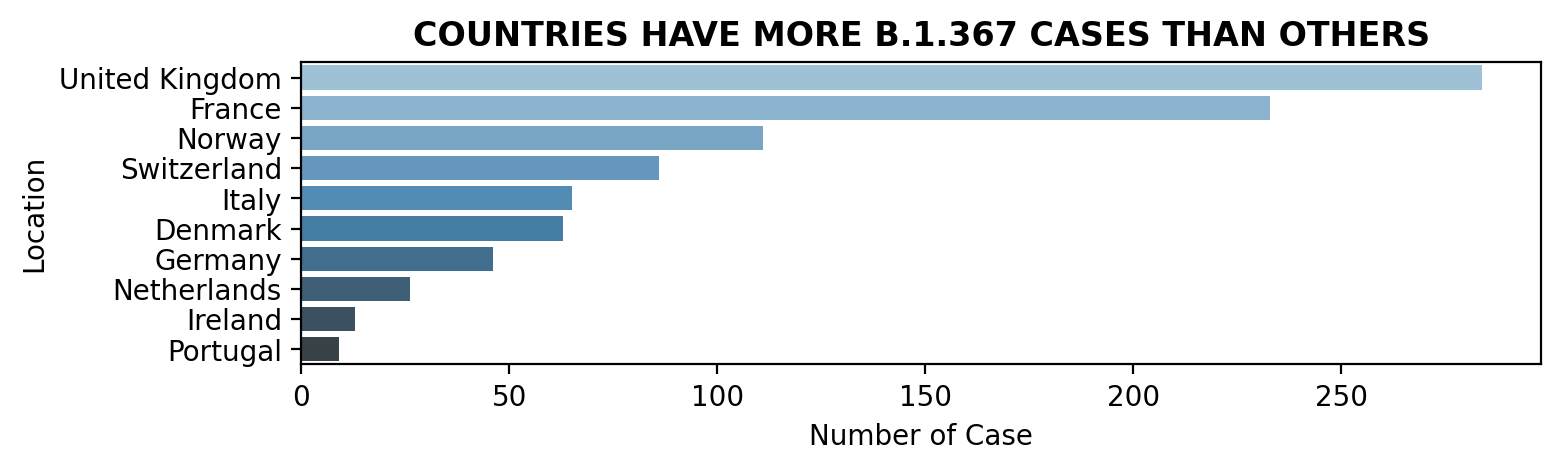

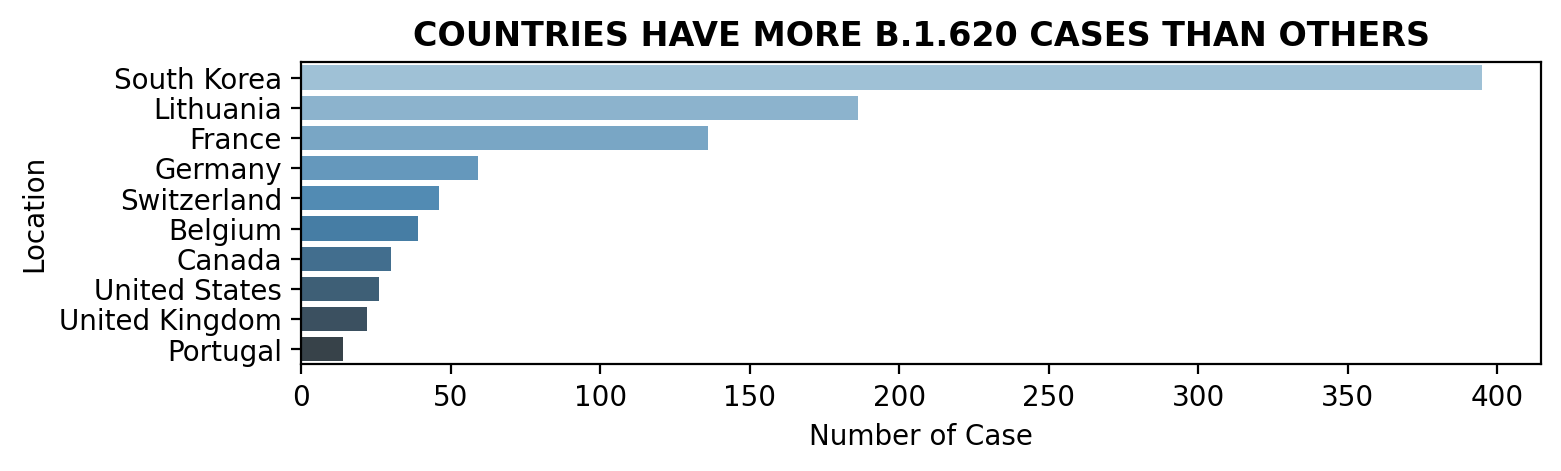

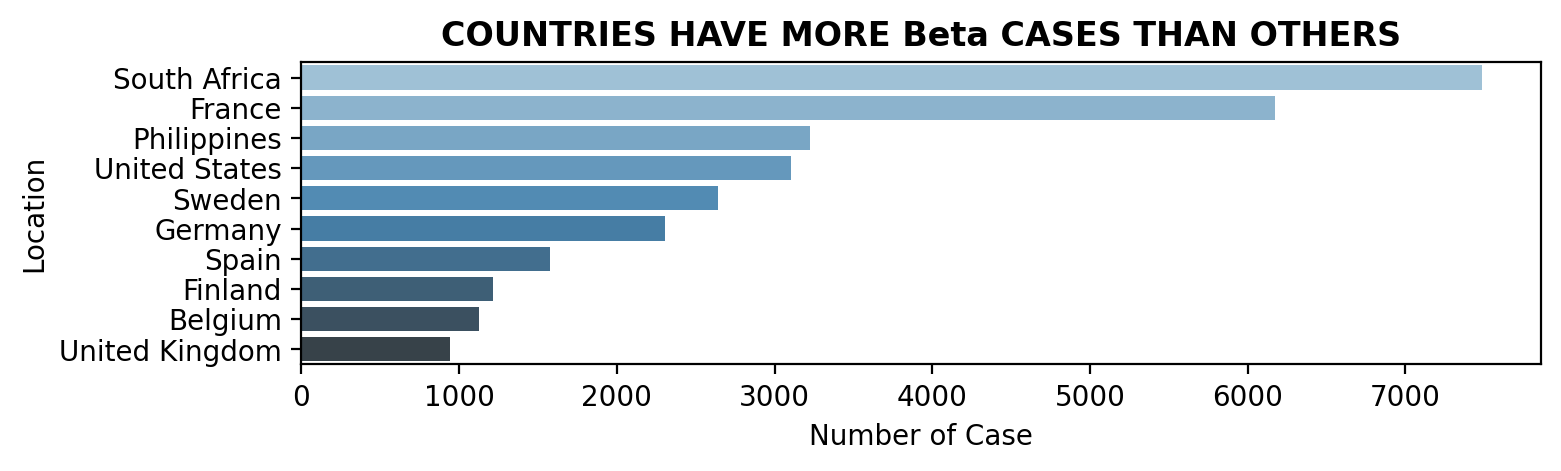

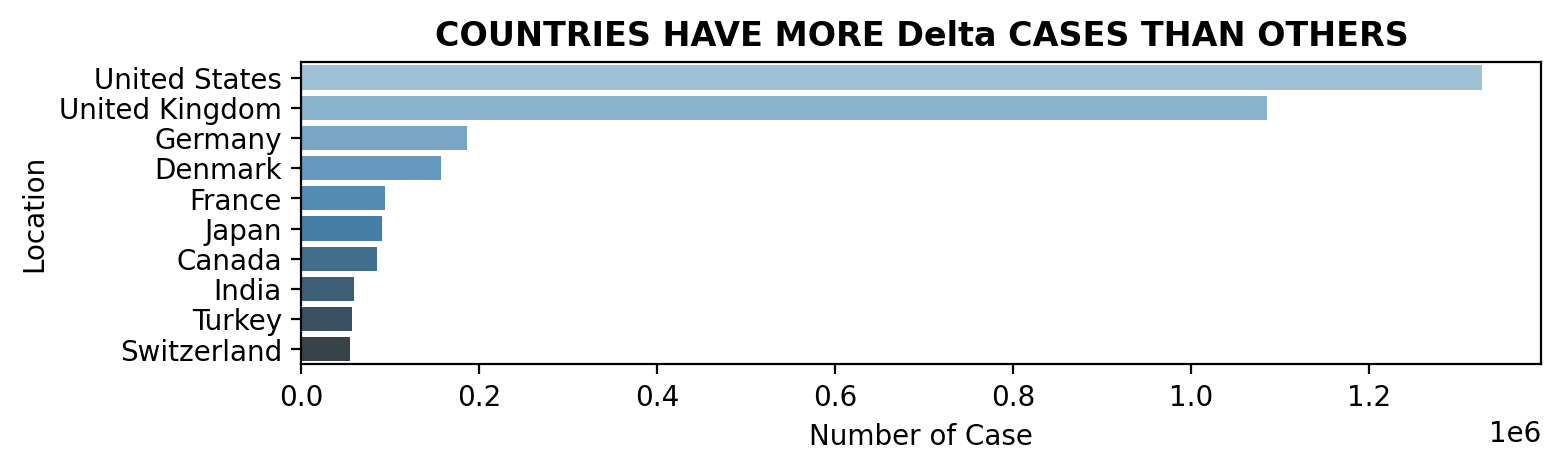

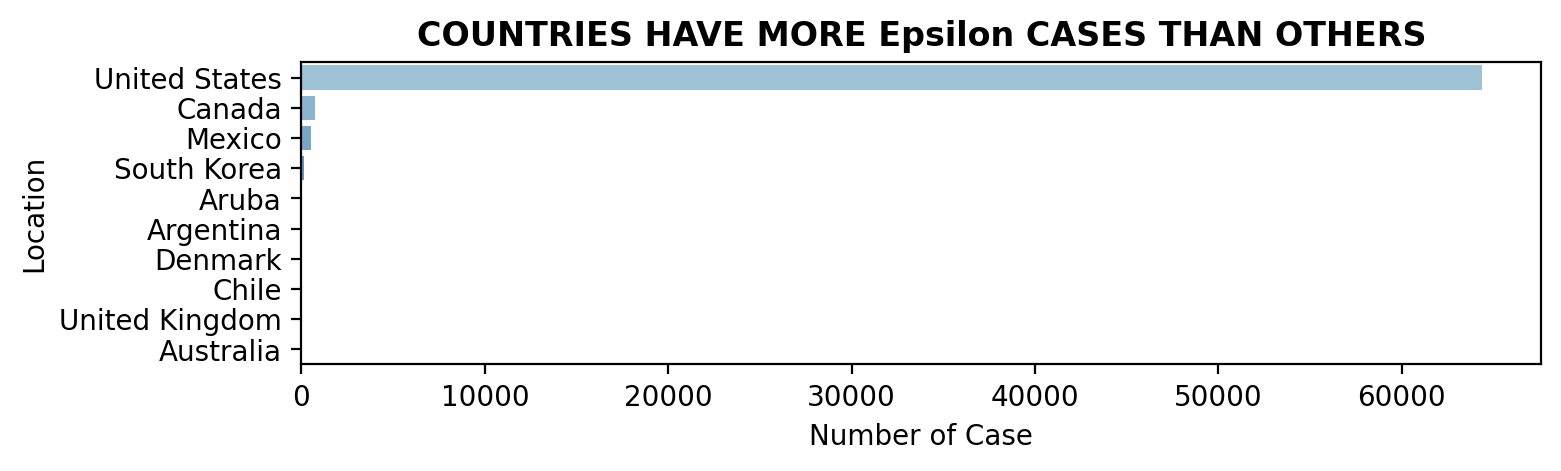

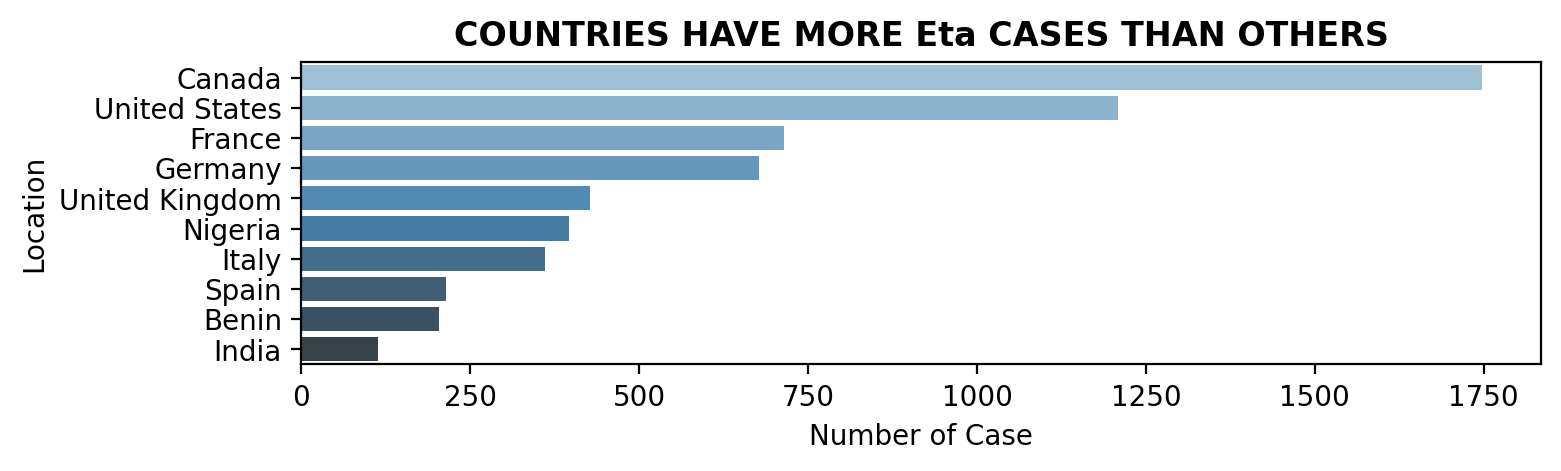

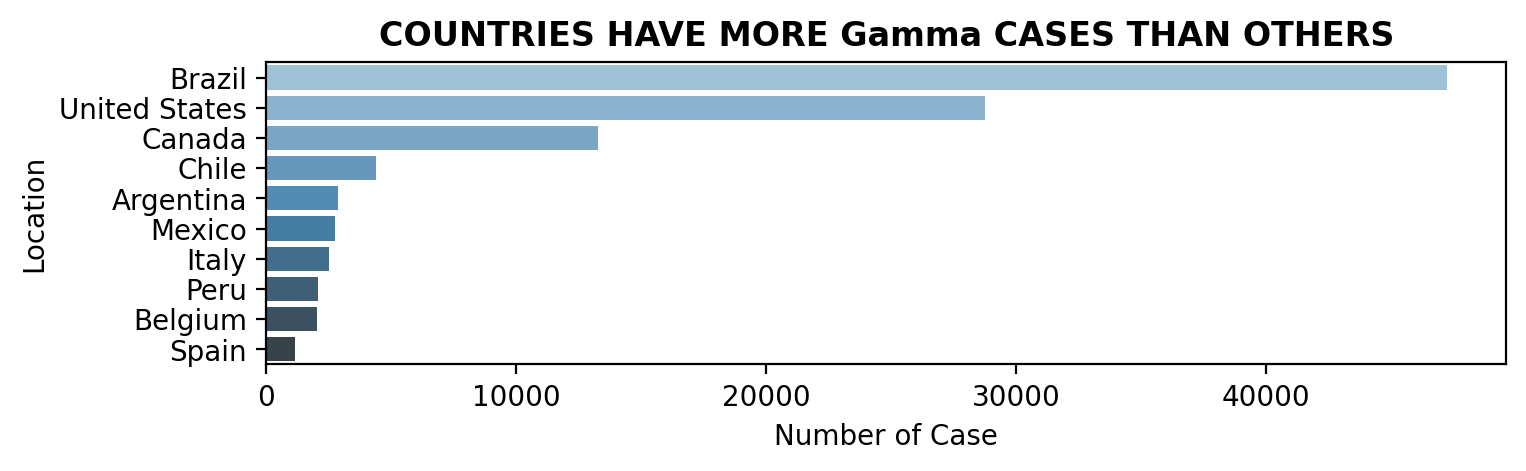

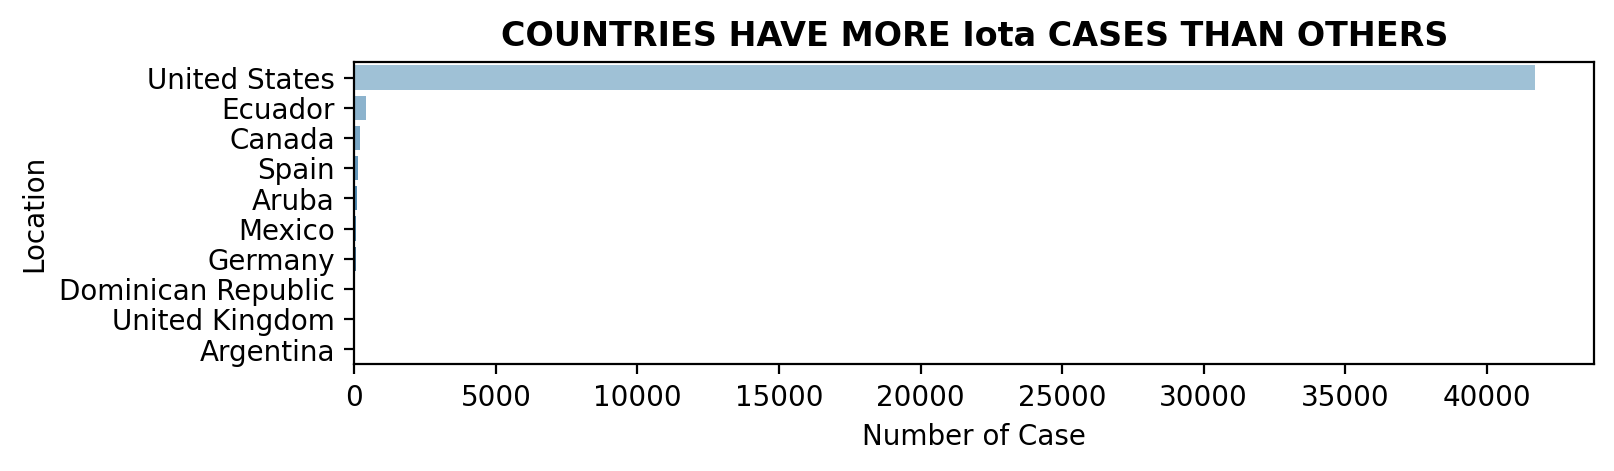

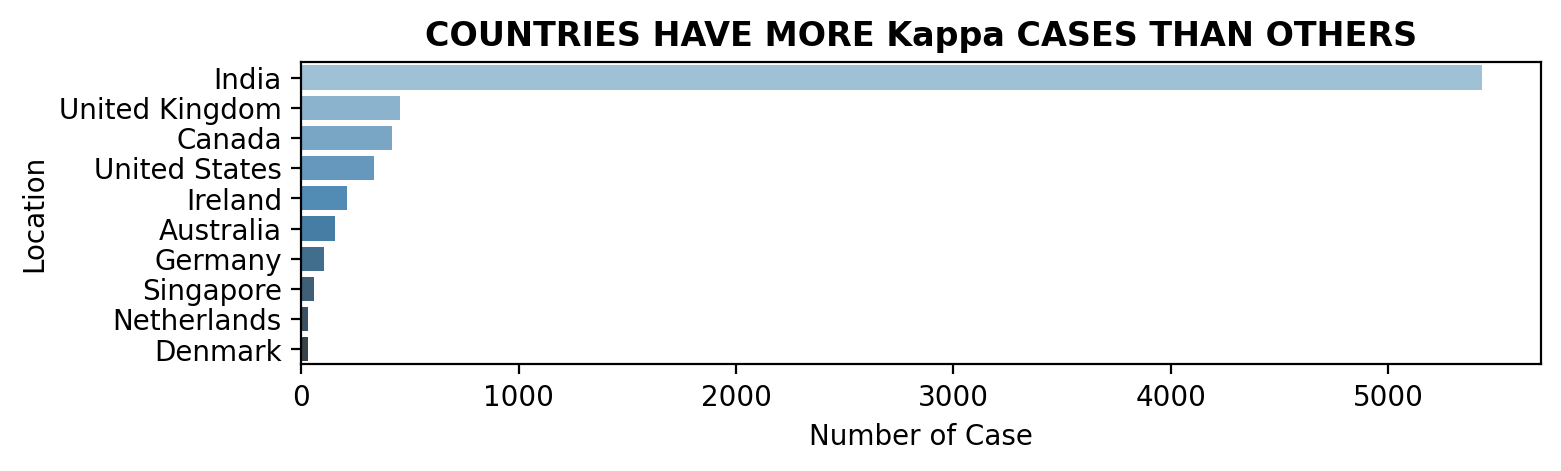

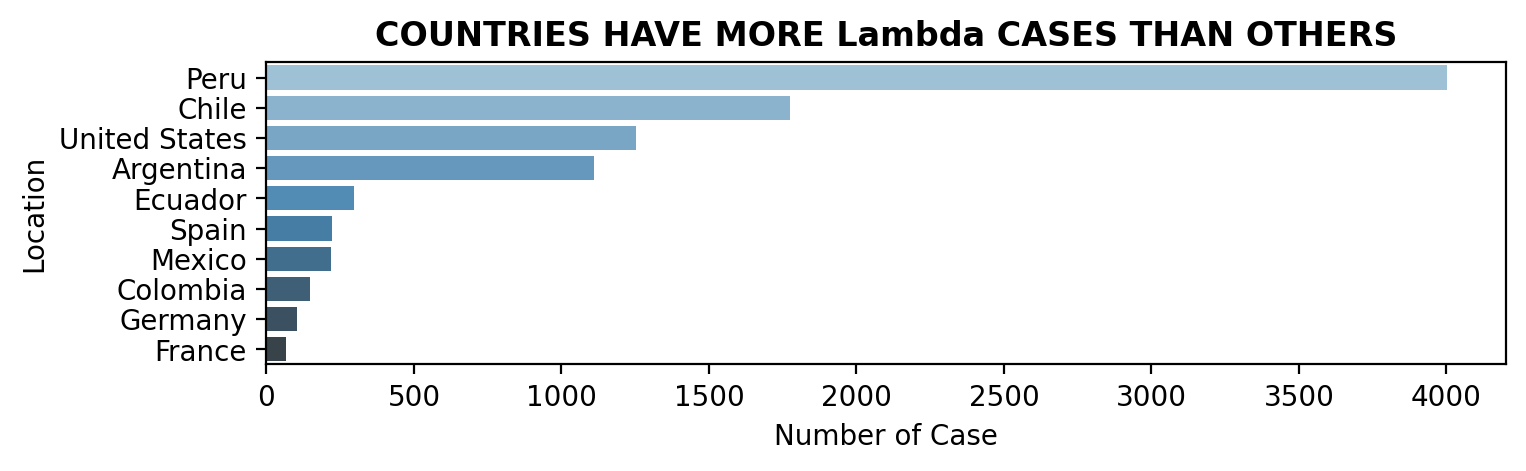

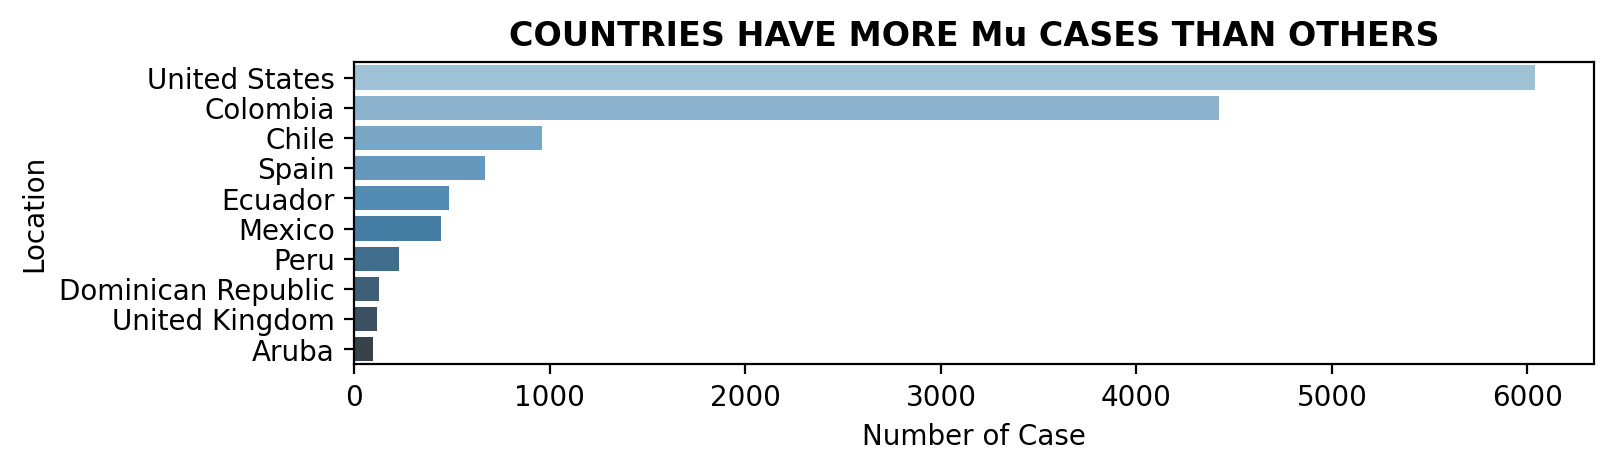

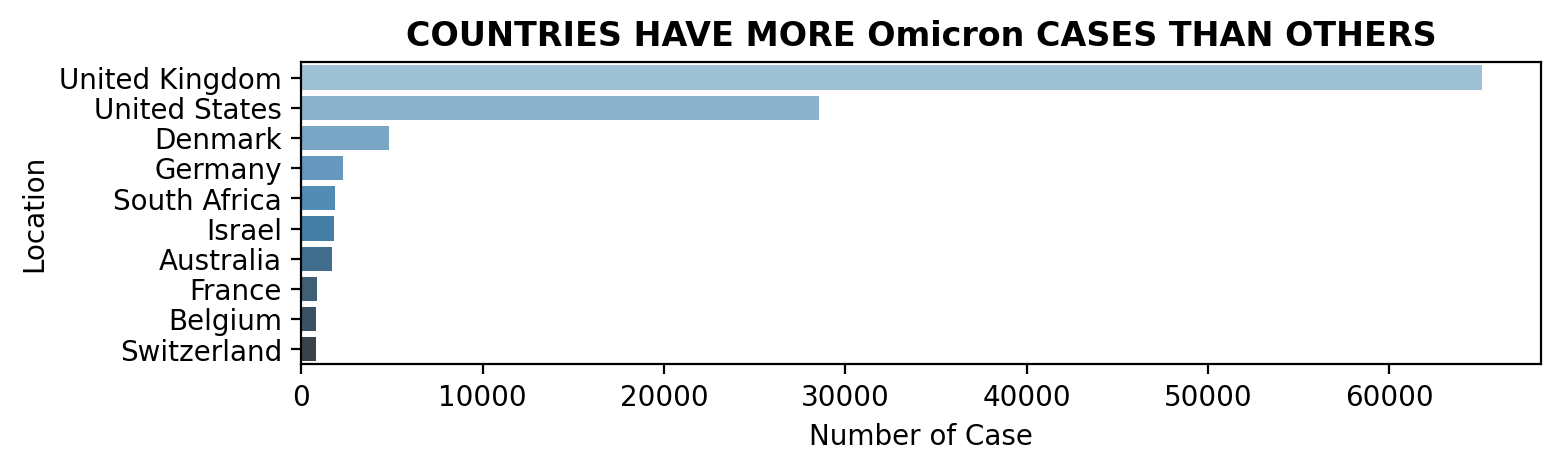

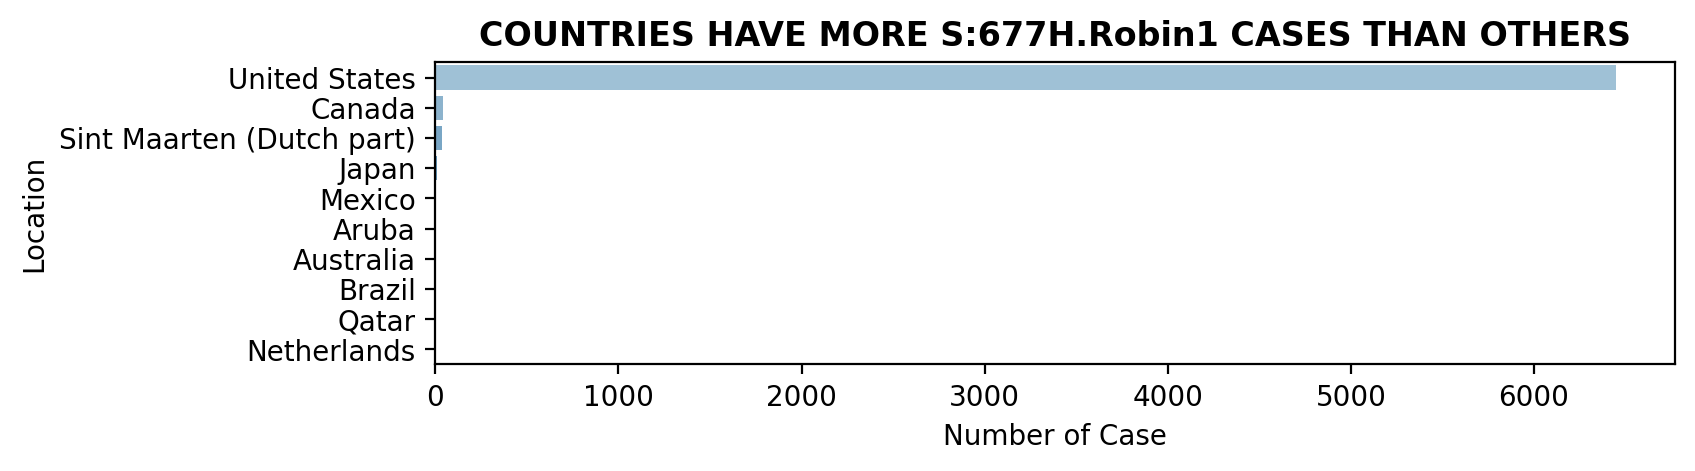

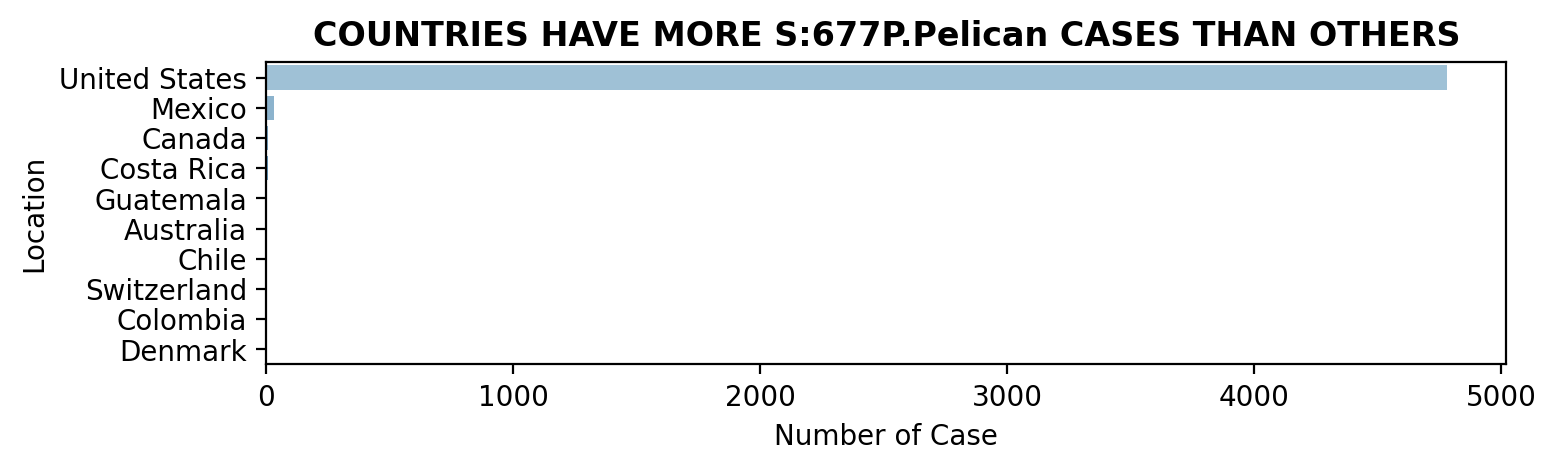

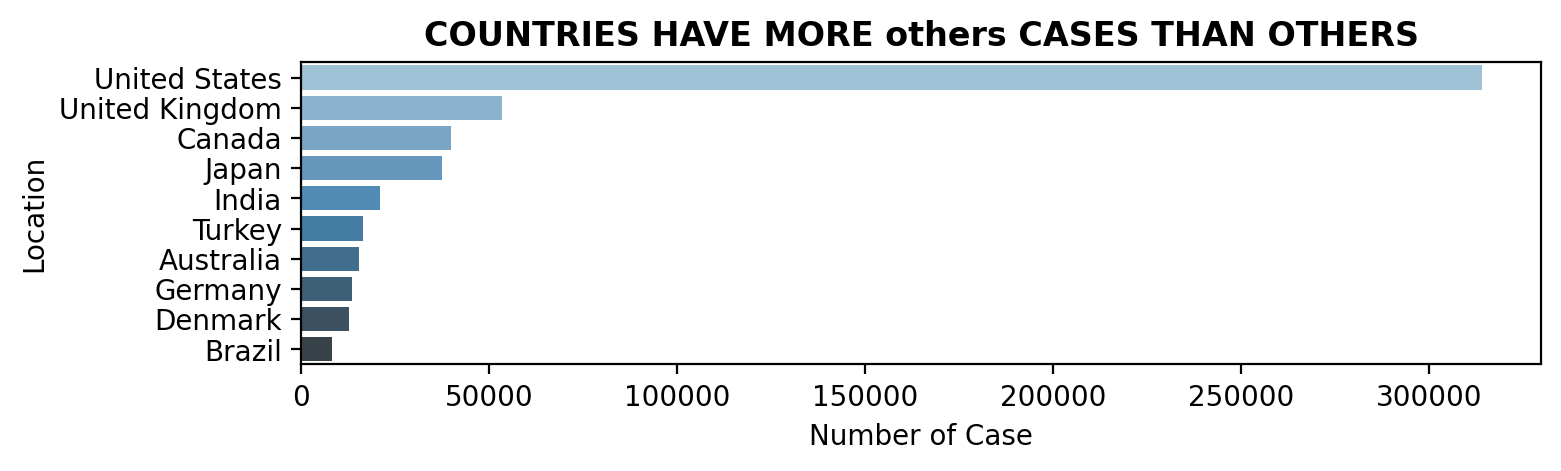

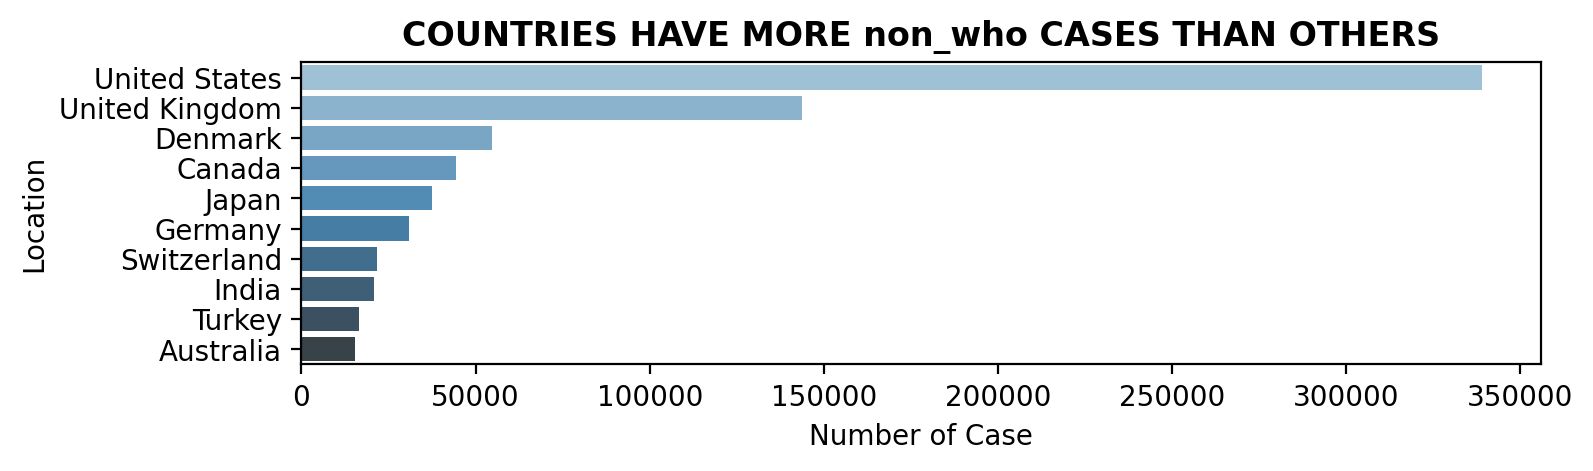

In [9]:
for virus in df.variant.unique():
    dataframe = df.loc[df['variant'] == virus].groupby('location')['num_sequences'].agg('sum').sort_values(ascending=False)[:10]
    dataframe = pd.DataFrame({'Location':dataframe.index, 'Number of Case':dataframe.values})
    plt.figure(figsize=(8,2),dpi=200)
    sns.barplot(y='Location',x="Number of Case",data=dataframe,palette="Blues_d")
    plt.title('COUNTRIES HAVE MORE {} CASES THAN OTHERS'.format(virus),loc='center',fontweight="bold")

Daily cases of omicron

In [10]:
sample = df.loc[df['variant'] == 'Omicron'].groupby('date')['num_sequences'].agg('sum')
dataframe = pd.DataFrame({'Date':sample.index, 'Number of Case':sample.values})
fig = px.area(dataframe, y="Number of Case",x='Date')
fig.show()

In [11]:
import datetime as dt
sample.index = pd.to_datetime(sample.index)

In [12]:
sample.index =sample.index.map(dt.datetime.toordinal)

In [13]:
x = sample.index

In [14]:
x

Int64Index([737556, 737570, 737584, 737598, 737612, 737626, 737640, 737654,
            737668, 737682, 737696, 737710, 737724, 737738, 737752, 737766,
            737780, 737794, 737801, 737815, 737829, 737843, 737857, 737871,
            737885, 737899, 737913, 737927, 737941, 737955, 737969, 737983,
            737997, 738011, 738025, 738039, 738053, 738067, 738081, 738095,
            738109, 738123, 738137, 738151, 738160],
           dtype='int64', name='date')

In [15]:
y=sample.values

In [16]:
y

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     1,     4,    42,  1303, 22643, 90795,   750])

Linear regression


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lr = LinearRegression()

In [21]:
lr.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

LinearRegression()

In [22]:
sample.head()

date
737556    0
737570    0
737584    0
737598    0
737612    0
Name: num_sequences, dtype: int64

In [23]:
sample.tail()

date
738109       42
738123     1303
738137    22643
738151    90795
738160      750
Name: num_sequences, dtype: int64

In [24]:
df.tail()

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
100411,Zimbabwe,2021-11-01,Omicron,0,0.0,6
100412,Zimbabwe,2021-11-01,S:677H.Robin1,0,0.0,6
100413,Zimbabwe,2021-11-01,S:677P.Pelican,0,0.0,6
100414,Zimbabwe,2021-11-01,others,0,0.0,6
100415,Zimbabwe,2021-11-01,non_who,0,0.0,6


In [25]:
y_pred=lr.predict(np.array(x_test).reshape(-1,1))

In [26]:
from sklearn.metrics import mean_squared_error
mean_squared_error(x_test,y_pred)

538534144563.357

In [27]:
lr.predict(np.array([[738161]])) 

array([[11482.12860616]])